In [11]:
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
student-performance-factors.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
from google.colab import files
import zipfile
import os

filename = r'//content/student-performance-factors.zip'

extract_dir = r'/content/student_performance'
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f'Files extracted to {extract_dir}')

Files extracted to /content/student_performance


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('//content/student_performance/StudentPerformanceFactors.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [16]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [17]:
df.isnull().sum()/df.shape[0]*100

,0
Hours_Studied,0.000000
Attendance,0.000000
Parental_Involvement,0.000000
Access_to_Resources,0.000000
Extracurricular_Activities,0.000000
Sleep_Hours,0.000000
Previous_Scores,0.000000
Motivation_Level,0.000000
Internet_Access,0.000000
Tutoring_Sessions,0.000000


In [18]:
df.shape

(6607, 20)

In [19]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [20]:
df_cleaned = df.dropna(subset=['Parental_Education_Level', 'Distance_from_Home','Teacher_Quality'])


In [21]:
df.shape

(6607, 20)

In [22]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [23]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [24]:
print(df[['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']].isnull().sum())


Parental_Education_Level    90
Distance_from_Home          67
Teacher_Quality             78
dtype: int64


In [25]:
df.replace('', np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)


In [26]:
df.dropna(inplace=True)


In [27]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [28]:
df.duplicated().sum()

0

In [29]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [30]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [31]:
df.shape

(6378, 20)

In [32]:
print(df.head(10))


   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   
5             19          88               Medium              Medium   
6             29          84               Medium                 Low   
7             25          78                  Low                High   
8             17          94               Medium                High   
9             23          98               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No          

In [33]:
income_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Family_Income'] = df['Family_Income'].replace(income_mapping)


<ipython-input-33-6d81dafa4d71>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Family_Income'] = df['Family_Income'].replace(income_mapping)


In [34]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,1,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,2,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,2,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,2,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,2,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,2,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,1,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,3,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,2,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,3,High,Public,Positive,5,No,High School,Moderate,Male,72


In [35]:
motivation_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Motivation_Level'] = df['Motivation_Level'].replace(motivation_mapping)


<ipython-input-35-3598dc152feb>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Motivation_Level'] = df['Motivation_Level'].replace(motivation_mapping)


In [36]:
unique_internet_access = df['Internet_Access'].unique()
print(unique_internet_access)


['Yes' 'No']


In [37]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,1,Yes,0,1,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,1,Yes,2,2,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,2,Yes,2,2,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,2,Yes,1,2,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,2,Yes,3,2,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,2,Yes,3,2,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,1,Yes,1,1,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,2,Yes,1,3,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,3,Yes,0,2,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,2,Yes,0,3,High,Public,Positive,5,No,High School,Moderate,Male,72


In [38]:
df['Internet_Access'] = df['Internet_Access'].replace({'Yes': 1, 'No': 0})



<ipython-input-38-91a82028eaf1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Internet_Access'] = df['Internet_Access'].replace({'Yes': 1, 'No': 0})


In [39]:
unique_Teacher_Quality= df['Teacher_Quality'].unique()
print(unique_Teacher_Quality)

['Medium' 'High' 'Low']


In [40]:
teacher_quality_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Teacher_Quality'] = df['Teacher_Quality'].replace(teacher_quality_mapping)

<ipython-input-40-706ac83291ff>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Teacher_Quality'] = df['Teacher_Quality'].replace(teacher_quality_mapping)


In [41]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,1,1,0,1,2,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,1,1,2,2,2,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,2,1,2,2,2,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,2,1,1,2,2,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,2,1,3,2,3,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,2,1,3,2,2,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,1,1,1,1,2,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,2,1,1,3,3,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,3,1,0,2,1,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,2,1,0,3,3,Public,Positive,5,No,High School,Moderate,Male,72


In [42]:
df['Parental_Involvement'].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [43]:
parental_involvement_mapping = {
    'Low': 1,
    'Medium': 2,
    'High': 3
}
df['Parental_Involvement'] = df['Parental_Involvement'].replace(parental_involvement_mapping)

<ipython-input-43-eb600814fa63>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Parental_Involvement'] = df['Parental_Involvement'].replace(parental_involvement_mapping)


In [44]:
df['Access_to_Resources'].unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [45]:
Access_to_Resources_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Access_to_Resources'] = df['Access_to_Resources'].replace(Access_to_Resources_mapping)

<ipython-input-45-7bf4dcdb2bac>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Access_to_Resources'] = df['Access_to_Resources'].replace(Access_to_Resources_mapping)


In [46]:
df['School_Type'].unique()

array(['Public', 'Private'], dtype=object)

In [47]:
School_Type_mapping = {'Public': 1, 'Private': 2}
df['School_Type'] = df['School_Type'].replace(School_Type_mapping)

<ipython-input-47-40d5adc34371>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['School_Type'] = df['School_Type'].replace(School_Type_mapping)


In [48]:
df['Learning_Disabilities'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
Learning_Disabilities_mapping = {'No': 0, 'Yes': 1}
df['Learning_Disabilities'] = df['Learning_Disabilities'].replace(Learning_Disabilities_mapping)

<ipython-input-49-4329dee2dced>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Learning_Disabilities'] = df['Learning_Disabilities'].replace(Learning_Disabilities_mapping)


In [50]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,No,7,73,1,1,0,1,2,1,Positive,3,0,High School,Near,Male,67
1,19,64,1,2,No,8,59,1,1,2,2,2,1,Negative,4,0,College,Moderate,Female,61
2,24,98,2,2,Yes,7,91,2,1,2,2,2,1,Neutral,4,0,Postgraduate,Near,Male,74
3,29,89,1,2,Yes,8,98,2,1,1,2,2,1,Negative,4,0,High School,Moderate,Male,71
4,19,92,2,2,Yes,6,65,2,1,3,2,3,1,Neutral,4,0,College,Near,Female,70
5,19,88,2,2,Yes,8,89,2,1,3,2,2,1,Positive,3,0,Postgraduate,Near,Male,71
6,29,84,2,1,Yes,7,68,1,1,1,1,2,2,Neutral,2,0,High School,Moderate,Male,67
7,25,78,1,3,Yes,6,50,2,1,1,3,3,1,Negative,2,0,High School,Far,Male,66
8,17,94,2,3,No,6,80,3,1,0,2,1,2,Neutral,1,0,College,Near,Male,69
9,23,98,2,2,Yes,8,71,2,1,0,3,3,1,Positive,5,0,High School,Moderate,Male,72


In [51]:
df['Parental_Education_Level'].unique()

array(['High School', 'College', 'Postgraduate'], dtype=object)

In [52]:
# Define the mapping for parental education level
parental_education_mapping = {'High School': 1,'College': 2,'Postgraduate': 3}
df['Parental_Education_Level'] = df['Parental_Education_Level'].replace(parental_education_mapping)

<ipython-input-52-e60178b8e9a9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Parental_Education_Level'] = df['Parental_Education_Level'].replace(parental_education_mapping)


In [53]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,No,7,73,1,1,0,1,2,1,Positive,3,0,1,Near,Male,67
1,19,64,1,2,No,8,59,1,1,2,2,2,1,Negative,4,0,2,Moderate,Female,61
2,24,98,2,2,Yes,7,91,2,1,2,2,2,1,Neutral,4,0,3,Near,Male,74
3,29,89,1,2,Yes,8,98,2,1,1,2,2,1,Negative,4,0,1,Moderate,Male,71
4,19,92,2,2,Yes,6,65,2,1,3,2,3,1,Neutral,4,0,2,Near,Female,70
5,19,88,2,2,Yes,8,89,2,1,3,2,2,1,Positive,3,0,3,Near,Male,71
6,29,84,2,1,Yes,7,68,1,1,1,1,2,2,Neutral,2,0,1,Moderate,Male,67
7,25,78,1,3,Yes,6,50,2,1,1,3,3,1,Negative,2,0,1,Far,Male,66
8,17,94,2,3,No,6,80,3,1,0,2,1,2,Neutral,1,0,2,Near,Male,69
9,23,98,2,2,Yes,8,71,2,1,0,3,3,1,Positive,5,0,1,Moderate,Male,72


In [54]:
gender_mapping = {'Male': 1, 'Female': 0}
df['Gender'] = df['Gender'].replace(gender_mapping)

<ipython-input-54-20d83b8aeb54>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace(gender_mapping)


In [55]:
df['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

In [56]:
# Define the mapping for distance from home
distance_mapping = {'Near': 1, 'Moderate': 2, 'Far': 3}

# Convert Distance_from_Home to numeric
df['Distance_from_Home'] = df['Distance_from_Home'].replace(distance_mapping)



<ipython-input-56-0fef82e658aa>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Distance_from_Home'] = df['Distance_from_Home'].replace(distance_mapping)


In [57]:
df.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,No,7,73,1,1,0,1,2,1,Positive,3,0,1,1,1,67
1,19,64,1,2,No,8,59,1,1,2,2,2,1,Negative,4,0,2,2,0,61
2,24,98,2,2,Yes,7,91,2,1,2,2,2,1,Neutral,4,0,3,1,1,74
3,29,89,1,2,Yes,8,98,2,1,1,2,2,1,Negative,4,0,1,2,1,71
4,19,92,2,2,Yes,6,65,2,1,3,2,3,1,Neutral,4,0,2,1,0,70
5,19,88,2,2,Yes,8,89,2,1,3,2,2,1,Positive,3,0,3,1,1,71
6,29,84,2,1,Yes,7,68,1,1,1,1,2,2,Neutral,2,0,1,2,1,67
7,25,78,1,3,Yes,6,50,2,1,1,3,3,1,Negative,2,0,1,3,1,66
8,17,94,2,3,No,6,80,3,1,0,2,1,2,Neutral,1,0,2,1,1,69
9,23,98,2,2,Yes,8,71,2,1,0,3,3,1,Positive,5,0,1,2,1,72


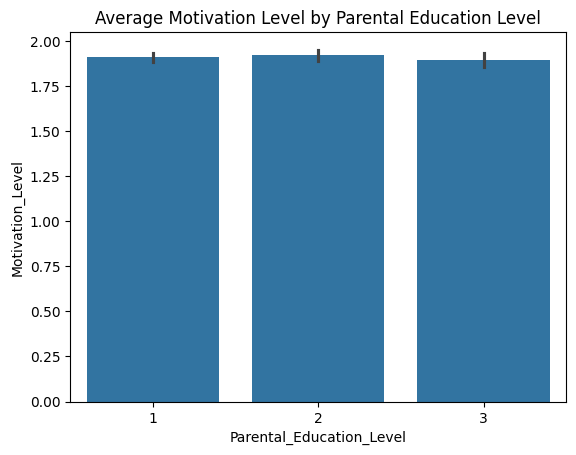

In [58]:
# Bar plot showing the average Motivation Level by Parental Education Level
sns.barplot(x='Parental_Education_Level', y='Motivation_Level', data=df)
plt.title('Average Motivation Level by Parental Education Level')
plt.show()


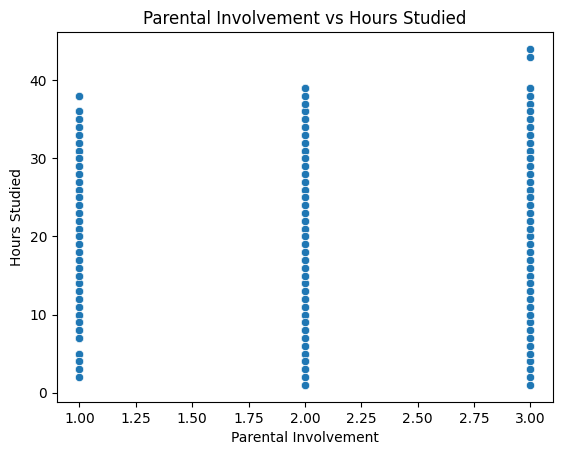

In [60]:
sns.scatterplot(x='Parental_Involvement', y='Hours_Studied', data=df)
plt.title('Parental Involvement vs Hours Studied')
plt.xlabel('Parental Involvement')
plt.ylabel('Hours Studied')
plt.show()

In [61]:
# Calculate the correlation coefficient
correlation = df['Parental_Involvement'].corr(df['Hours_Studied'])
print(f"Correlation between Parental Involvement and Hours Studied: {correlation:.2f}")


Correlation between Parental Involvement and Hours Studied: -0.01


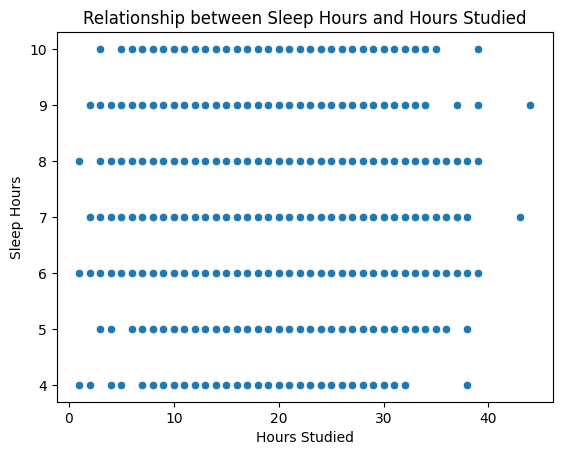

In [63]:
sns.scatterplot(x='Hours_Studied', y='Sleep_Hours', data=df)
plt.title('Relationship between Sleep Hours and Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Sleep Hours')
plt.show()

In [73]:
correlation = df['Sleep_Hours'].corr(df['Hours_Studied'])
print(f"Correlation between Sleep Hours and Hours Studied: {correlation:.2f}")


Correlation between Sleep Hours and Hours Studied: 0.01


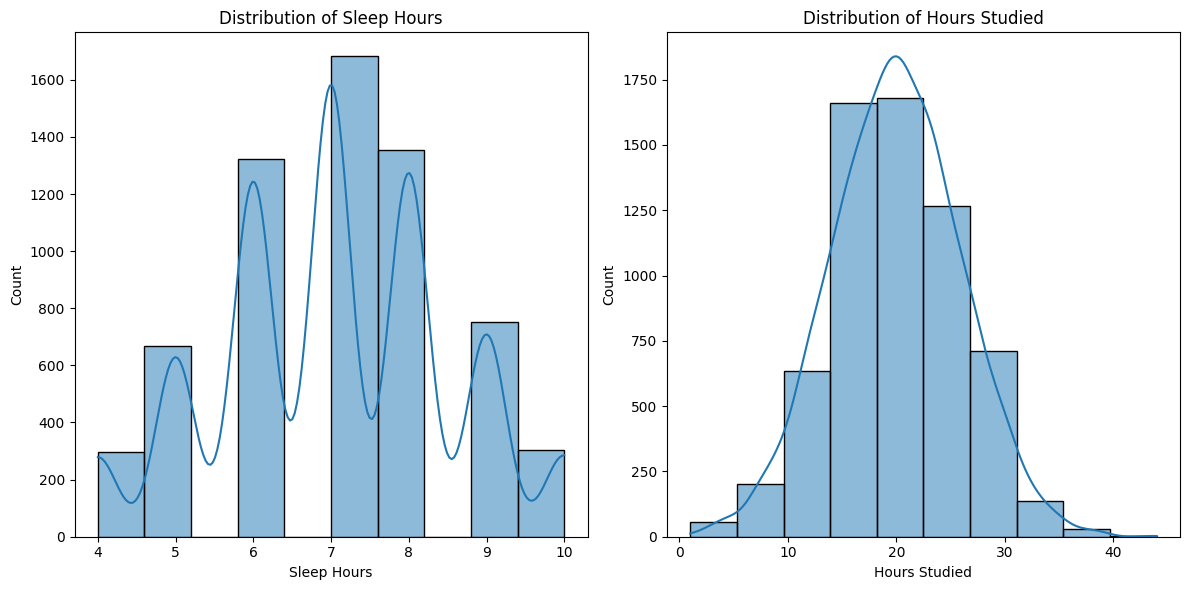

In [74]:
# Histogram for Sleep Hours and Hours Studied
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Sleep_Hours'], bins=10, kde=True)
plt.title('Distribution of Sleep Hours')
plt.xlabel('Sleep Hours')

plt.subplot(1, 2, 2)
sns.histplot(df['Hours_Studied'], bins=10, kde=True)
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


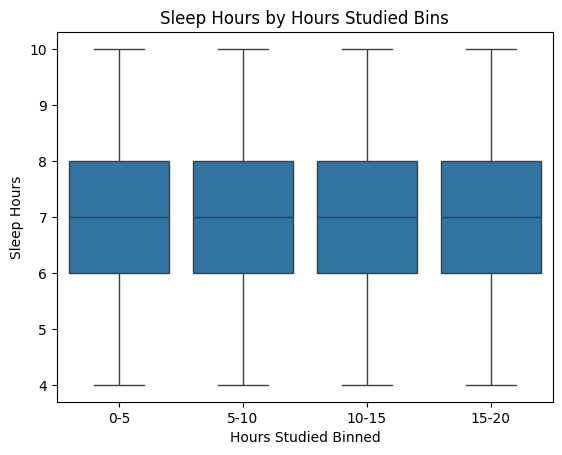

In [75]:
# Create bins for Hours Studied
bins = [0, 5, 10, 15, 20]  # Adjust these bins as necessary
labels = ['0-5', '5-10', '10-15', '15-20']
df['Hours_Studied_Binned'] = pd.cut(df['Hours_Studied'], bins=bins, labels=labels)

# Box plot
sns.boxplot(x='Hours_Studied_Binned', y='Sleep_Hours', data=df)
plt.title('Sleep Hours by Hours Studied Bins')
plt.xlabel('Hours Studied Binned')
plt.ylabel('Sleep Hours')
plt.show()


<ipython-input-76-432eaa47405e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_sleep = df.groupby('Hours_Studied_Binned')['Sleep_Hours'].mean().reset_index()


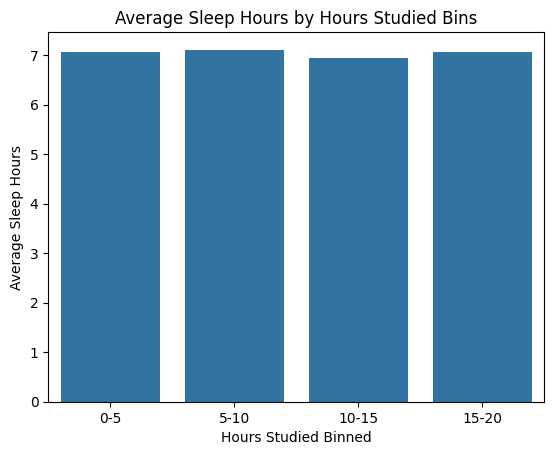

In [76]:
# Bar plot
average_sleep = df.groupby('Hours_Studied_Binned')['Sleep_Hours'].mean().reset_index()
sns.barplot(x='Hours_Studied_Binned', y='Sleep_Hours', data=average_sleep)
plt.title('Average Sleep Hours by Hours Studied Bins')
plt.xlabel('Hours Studied Binned')
plt.ylabel('Average Sleep Hours')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


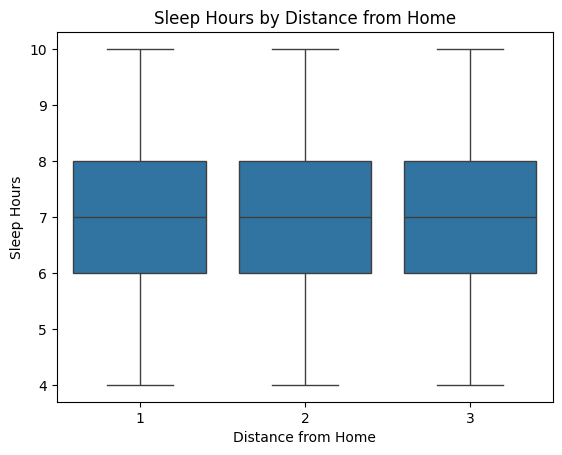

In [77]:
# Box plot
sns.boxplot(x='Distance_from_Home', y='Sleep_Hours', data=df)
plt.title('Sleep Hours by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Sleep Hours')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


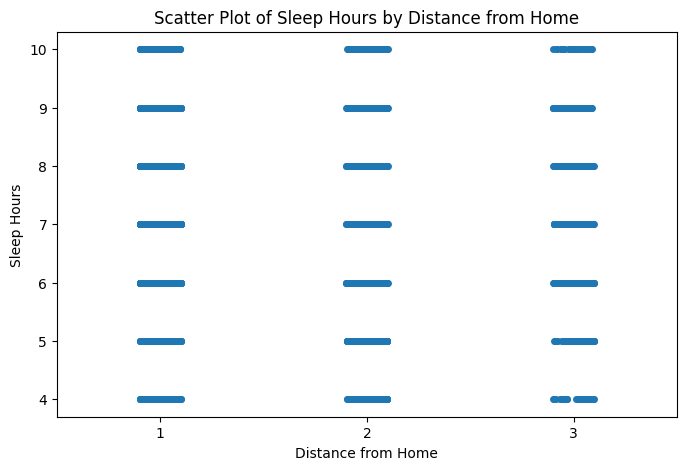

In [78]:
plt.figure(figsize=(8, 5))
sns.stripplot(x='Distance_from_Home', y='Sleep_Hours', data=df, jitter=True)
plt.title('Scatter Plot of Sleep Hours by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Sleep Hours')
plt.show()


In [80]:
# Calculate correlation between Distance_from_Home and Sleep_Hours
correlation = df['Distance_from_Home'].corr(df['Sleep_Hours'])
print(f"Correlation between Distance from Home and Sleep Hours: {correlation:.2f}")


Correlation between Distance from Home and Sleep Hours: 0.00


In [81]:
correlation = df['Motivation_Level'].corr(df['Exam_Score'])
print(f"Correlation between Motivation Level and Exam Score: {correlation:.2f}")


Correlation between Motivation Level and Exam Score: 0.09


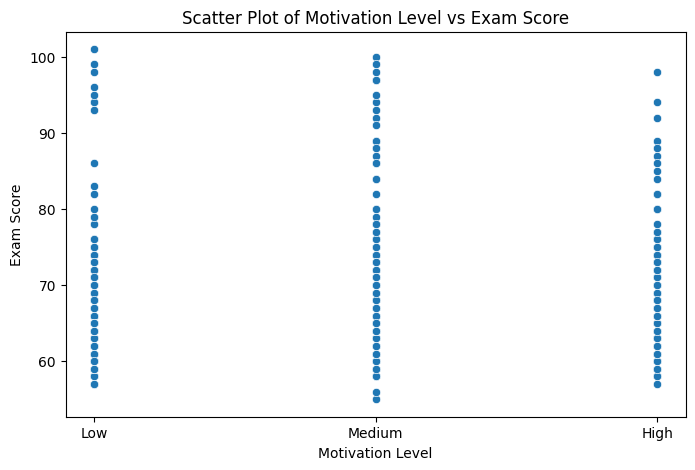

In [83]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Scatter Plot of Motivation Level vs Exam Score')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.xticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'])  # Adjust as necessary
plt.show()

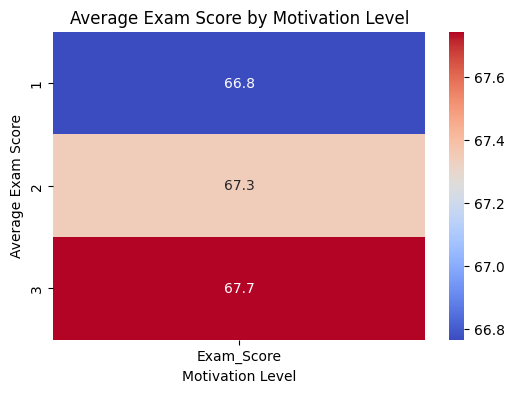

In [86]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(values='Exam_Score', index='Motivation_Level', aggfunc='mean')

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Average Exam Score by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Average Exam Score')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


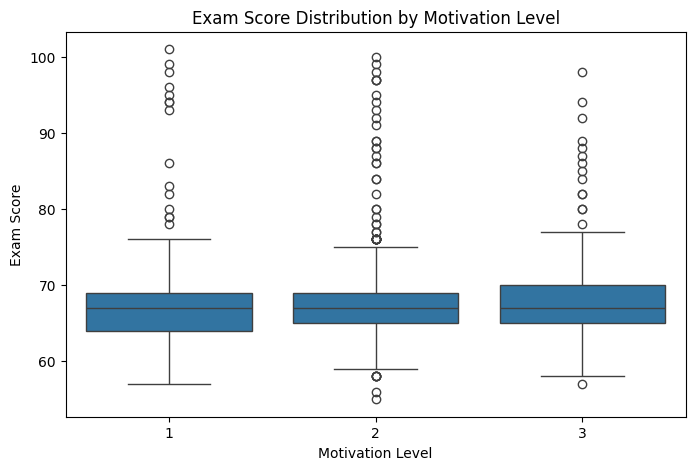

In [84]:
# Box plot for Exam_Score by Motivation_Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Motivation_Level', y='Exam_Score', data=df)
plt.title('Exam Score Distribution by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Exam Score')
plt.show()


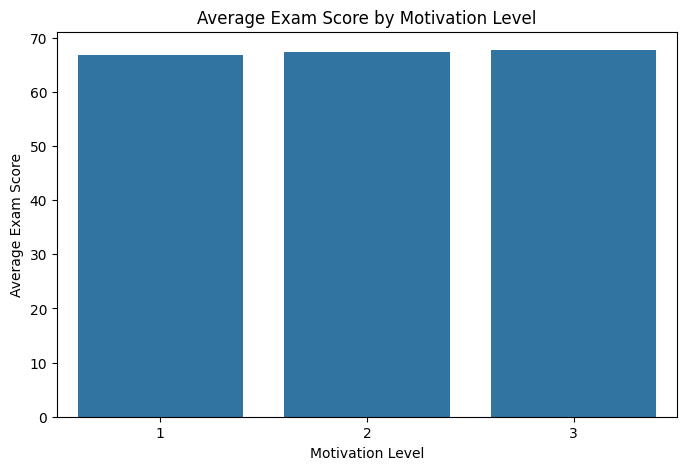

In [85]:
# Calculate average exam scores for each motivation level
average_scores = df.groupby('Motivation_Level')['Exam_Score'].mean().reset_index()

# Bar plot for average Exam Score by Motivation Level
plt.figure(figsize=(8, 5))
sns.barplot(x='Motivation_Level', y='Exam_Score', data=average_scores)
plt.title('Average Exam Score by Motivation Level')
plt.xlabel('Motivation Level')
plt.ylabel('Average Exam Score')
plt.show()


In [88]:
# Calculate correlation between Family_Income and School_Type
correlation = df['Family_Income'].corr(df['School_Type_numeric'])
print(f"Correlation between Family Income and School Type: {correlation:.2f}")


Correlation between Family Income and School Type: -0.01


In [90]:
# Calculate correlation between Previous_Scores and Motivation_Level
correlation = df['Previous_Scores'].corr(df['Motivation_Level'])
print(f"Correlation between Previous Scores and Motivation Level: {correlation:.2f}")


Correlation between Previous Scores and Motivation Level: 0.01


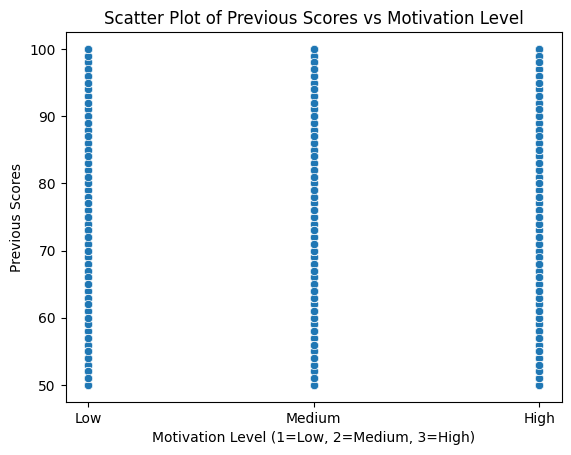

In [91]:
sns.scatterplot(x='Motivation_Level', y='Previous_Scores', data=df)
plt.title('Scatter Plot of Previous Scores vs Motivation Level')
plt.xlabel('Motivation Level (1=Low, 2=Medium, 3=High)')
plt.ylabel('Previous Scores')
plt.xticks(ticks=[1, 2, 3], labels=['Low', 'Medium', 'High'])  # Adjust labels as necessary
plt.show()

In [92]:
correlation = df['Hours_Studied'].corr(df['Exam_Score'])
print(f"Correlation between Hours Studied and Exam Score: {correlation:.2f}")

Correlation between Hours Studied and Exam Score: 0.45


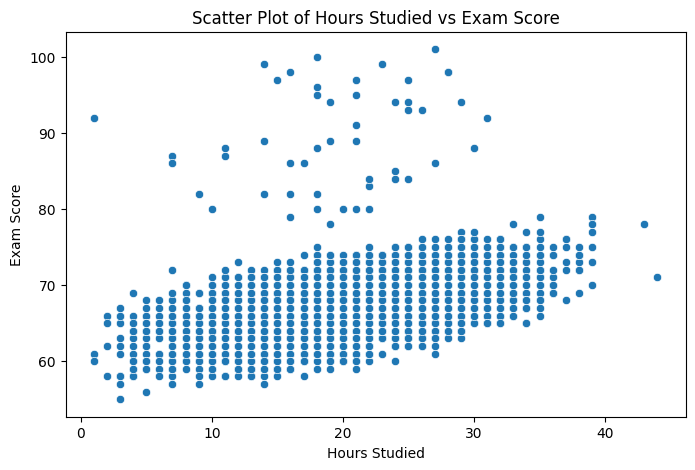

In [93]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Scatter Plot of Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

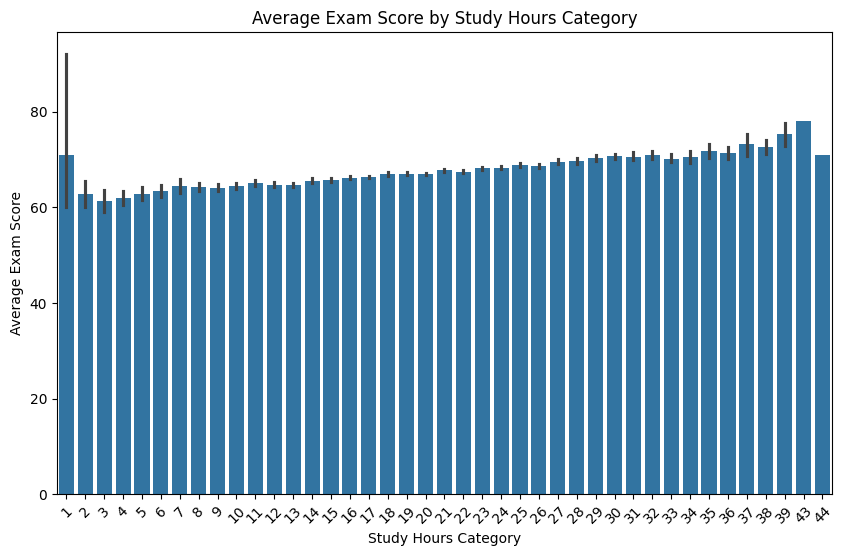

In [101]:
# Bar Plot: Average Exam Score by Study Hours Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Average Exam Score by Study Hours Category')
plt.xlabel('Study Hours Category')
plt.ylabel('Average Exam Score')
plt.xticks(rotation=45)
plt.show()

In [107]:
# Calculate correlation
correlation = df['Attendance'].corr(df['Teacher_Quality'])
print(f"Correlation between Attendance and Teacher Quality: {correlation}")


Correlation between Attendance and Teacher Quality: -0.0017218545134965466
